Getting Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Import Libraries
import os
import glob
import matplotlib.pyplot as plt
import numpy as np# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [16]:
# Load data from google drive.
train_dir ="drive/My Drive/plant_disease/train"
test_dir="drive/My Drive/plant_disease/test/"

In [17]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [18]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

6 Classes
4044 Train images
1095 Test images


Data Preprocessing

In [19]:
# Pre-processing data with parameters.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height),batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 4044 images belonging to 6 classes.
Found 1095 images belonging to 6 classes.


In [21]:
# Name of classes.
train_generator.class_indices

{'Potato___Early_blight': 0,
 'Potato___Late_blight': 1,
 'Potato___healthy': 2,
 'Tomato___Early_blight': 3,
 'Tomato___Late_blight': 4,
 'Tomato___healthy': 5}

Building Model

In [22]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [23]:
validation_generator = train_datagen.flow_from_directory(
                       train_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)

Found 4044 images belonging to 6 classes.


In [28]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train = model.fit_generator(train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
126/126 [==============================] - 974s 8s/step - loss: 1.3783 - accuracy: 0.4925 - val_loss: 0.7414 - val_accuracy: 0.7302
Epoch 2/10
126/126 [==============================] - 470s 4s/step - loss: 0.6408 - accuracy: 0.7545 - val_loss: 0.5885 - val_accuracy: 0.7835
Epoch 3/10
126/126 [==============================] - 465s 4s/step - loss: 0.5564 - accuracy: 0.7919 - val_loss: 0.4296 - val_accuracy: 0.8385
Epoch 4/10
126/126 [==============================] - 465s 4s/step - loss: 0.4399 - accuracy: 0.8352 - val_loss: 0.4123 - val_accuracy: 0.8472
Epoch 5/10
126/126 [==============================] - 463s 4s/step - loss: 0.3823 - accuracy: 0.8634 - val_loss: 0.2853 - val_accuracy: 0.8958
Epoch 6/10
126/126 [==============================] - 462s 4s/step - loss: 0.3343 - accuracy: 0.8774 - val_loss: 0.6522 - val_accuracy: 0.7535
Epoch 7/10
126/126 [==============================] - 462s 4s/step

Checking Performance

Text(0.5, 0, 'Training Steps')

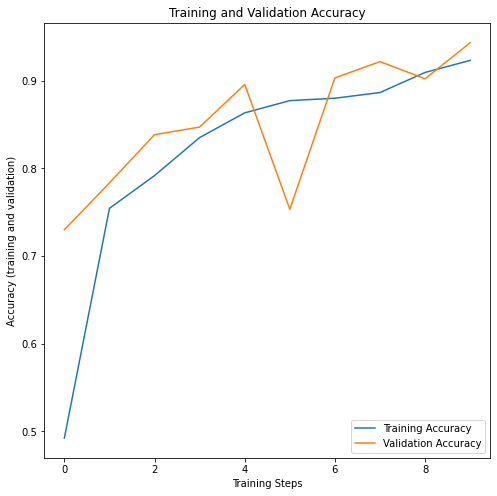

In [29]:
import matplotlib.pylab as plt
import numpy as np
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8, 8))

# Accuracy Graph
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

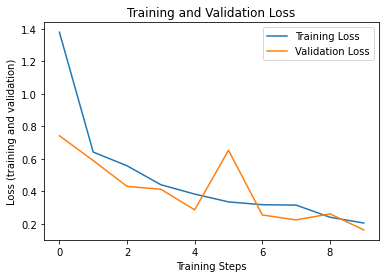

In [30]:
# Loss Graph
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

Saving Model

In [31]:
 # Save model
from keras.models import load_model
model.save('crop.h5')

In [20]:
 # Save model
from keras.models import load_model
model.save('/content/drive/My Drive/crop.h5')

In [32]:
 # Loading model and predict.
from keras.models import load_model
model=load_model('/content/drive/My Drive/crop.h5')
# Mention name of the disease into list.
Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy","Tomato___Early_blight","Tomato___Late_blight","Tomato___healthy"]

Testing Model

In [33]:
import numpy as np
import matplotlib.pyplot as plt# Pre-Processing test data same as train data.
img_width=256
img_height=256
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing import image
 
# Preprocessing Image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))

    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
 


Tomato___Early_blight 0.93373376


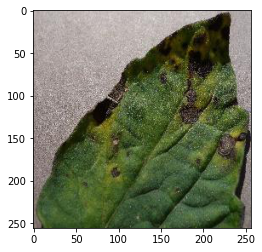

In [15]:
result = model.predict([prepare('/content/drive/My Drive/plant_disease/train/Tomato___Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG')])
disease=image.load_img('/content/drive/My Drive/plant_disease/train/Tomato___Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG')
plt.imshow(disease)
class_idx = np.argmax(result)
print(Classes[class_idx],result[0][class_idx])

Converting to TFlite

In [34]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model( model) 
model = converter.convert()
file = open( '/content/drive/My Drive/plant_disease/output.tflite' , 'wb' ) 
file.write( model )

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpm52wuqcu/assets


47709556